In [2]:
import pandas as pd
import numpy as np
df1 = pd.read_csv("../traffic_data.csv")
df2 = pd.read_csv("../traffic_data2.csv")
combined_df = pd.concat([df1, df2], ignore_index=True)
combined_df = combined_df.drop_duplicates()

combined_df.to_csv("../traffic_data_combined.csv", index=False)


In [3]:
print(combined_df.head())


             Timestamp  Latitude  Longitude  RedPixels  OrangePixels  \
0  2025-06-11 12-04-23      13.0      79.95        346           829   
1  2025-06-11 12-04-23      13.0      79.96        346          1052   
2  2025-06-11 12-04-23      13.0      79.97        346          1233   
3  2025-06-11 12-04-23      13.0      79.98        381          1482   
4  2025-06-11 12-04-23      13.0      79.99        435          1786   

   GreenPixels  
0        11081  
1        17167  
2        16513  
3        14407  
4        10528  


In [6]:

combined_df['Timestamp'] = pd.to_datetime(combined_df['Timestamp'], format="%Y-%m-%d %H-%M-%S")
combined_df.head()


,Timestamp,Latitude,Longitude,RedPixels,OrangePixels,GreenPixels
0,2025-06-11 12:04:23,13.0,79.95,346,829,11081
1,2025-06-11 12:04:23,13.0,79.96,346,1052,17167
2,2025-06-11 12:04:23,13.0,79.97,346,1233,16513
3,2025-06-11 12:04:23,13.0,79.98,381,1482,14407
4,2025-06-11 12:04:23,13.0,79.99,435,1786,10528


In [8]:
combined_df['Hour'] = combined_df['Timestamp'].dt.hour
combined_df['Day'] = combined_df['Timestamp'].dt.day
combined_df['Weekday'] = combined_df['Timestamp'].dt.weekday
combined_df['Month'] = combined_df['Timestamp'].dt.month
combined_df.head()


,Timestamp,Latitude,Longitude,RedPixels,OrangePixels,GreenPixels,Hour,Day,Weekday,Month
0,2025-06-11 12:04:23,13.0,79.95,346,829,11081,12,11,2,6
1,2025-06-11 12:04:23,13.0,79.96,346,1052,17167,12,11,2,6
2,2025-06-11 12:04:23,13.0,79.97,346,1233,16513,12,11,2,6
3,2025-06-11 12:04:23,13.0,79.98,381,1482,14407,12,11,2,6
4,2025-06-11 12:04:23,13.0,79.99,435,1786,10528,12,11,2,6


In [10]:
combined_df['TotalPixels'] = combined_df['RedPixels'] + combined_df['OrangePixels'] + combined_df['GreenPixels']

combined_df = combined_df[combined_df['TotalPixels'] > 0]
combined_df['RedRatio'] = combined_df['RedPixels'] / combined_df['TotalPixels']
combined_df['OrangeRatio'] = combined_df['OrangePixels'] / combined_df['TotalPixels']
combined_df['GreenRatio'] = combined_df['GreenPixels'] / combined_df['TotalPixels']
print(combined_df.head())


            Timestamp  Latitude  Longitude  RedPixels  OrangePixels  \
0 2025-06-11 12:04:23      13.0      79.95        346           829   
1 2025-06-11 12:04:23      13.0      79.96        346          1052   
2 2025-06-11 12:04:23      13.0      79.97        346          1233   
3 2025-06-11 12:04:23      13.0      79.98        381          1482   
4 2025-06-11 12:04:23      13.0      79.99        435          1786   

   GreenPixels  Hour  Day  Weekday  Month  TotalPixels  RedRatio  OrangeRatio  \
0        11081    12   11        2      6        12256  0.028231     0.067640   
1        17167    12   11        2      6        18565  0.018637     0.056666   
2        16513    12   11        2      6        18092  0.019124     0.068152   
3        14407    12   11        2      6        16270  0.023417     0.091088   
4        10528    12   11        2      6        12749  0.034120     0.140089   

   GreenRatio  
0    0.904129  
1    0.924697  
2    0.912724  
3    0.885495  
4    0

In [11]:
combined_df['CongestionScore'] = combined_df['RedPixels'] * 3 + combined_df['OrangePixels'] * 2 + combined_df['GreenPixels']
print(combined_df.head())

            Timestamp  Latitude  Longitude  RedPixels  OrangePixels  \
0 2025-06-11 12:04:23      13.0      79.95        346           829   
1 2025-06-11 12:04:23      13.0      79.96        346          1052   
2 2025-06-11 12:04:23      13.0      79.97        346          1233   
3 2025-06-11 12:04:23      13.0      79.98        381          1482   
4 2025-06-11 12:04:23      13.0      79.99        435          1786   

   GreenPixels  Hour  Day  Weekday  Month  TotalPixels  RedRatio  OrangeRatio  \
0        11081    12   11        2      6        12256  0.028231     0.067640   
1        17167    12   11        2      6        18565  0.018637     0.056666   
2        16513    12   11        2      6        18092  0.019124     0.068152   
3        14407    12   11        2      6        16270  0.023417     0.091088   
4        10528    12   11        2      6        12749  0.034120     0.140089   

   GreenRatio  CongestionScore  
0    0.904129            13777  
1    0.924697       

In [17]:
quantiles = combined_df['CongestionScore'].quantile([0.33, 0.66])

def label_traffic(score):
    if score <= quantiles[0.33]:
        return 'Light'
    elif score <= quantiles[0.66]:
        return 'Moderate'
    else:
        return 'Heavy'

combined_df['TrafficLevel'] = combined_df['CongestionScore'].apply(label_traffic)
combined_df['TrafficLevel'].head(30)


0        Heavy
1        Heavy
2        Heavy
3        Heavy
4        Heavy
5     Moderate
6     Moderate
7     Moderate
8        Light
9        Light
10       Light
11    Moderate
12       Heavy
13       Heavy
14       Heavy
15       Heavy
16       Heavy
17       Heavy
18       Heavy
19       Heavy
20       Heavy
21       Heavy
22       Heavy
23       Heavy
24       Heavy
25       Heavy
26       Heavy
27       Heavy
28       Heavy
29       Heavy
Name: TrafficLevel, dtype: object

In [20]:

combined_df['LatBin'] = combined_df['Latitude'].round(3)
combined_df['LonBin'] = combined_df['Longitude'].round(3)
combined_df.head(100)


,Timestamp,Latitude,Longitude,RedPixels,OrangePixels,GreenPixels,Hour,Day,Weekday,Month,TotalPixels,RedRatio,OrangeRatio,GreenRatio,CongestionScore,TrafficLevel,LatBin,LonBin
0,2025-06-11 12:04:23,13.00,79.95,346,829,11081,12,11,2,6,12256,0.028231,0.067640,0.904129,13777,Heavy,13.00,79.95
1,2025-06-11 12:04:23,13.00,79.96,346,1052,17167,12,11,2,6,18565,0.018637,0.056666,0.924697,20309,Heavy,13.00,79.96
2,2025-06-11 12:04:23,13.00,79.97,346,1233,16513,12,11,2,6,18092,0.019124,0.068152,0.912724,20017,Heavy,13.00,79.97
3,2025-06-11 12:04:23,13.00,79.98,381,1482,14407,12,11,2,6,16270,0.023417,0.091088,0.885495,18514,Heavy,13.00,79.98
4,2025-06-11 12:04:23,13.00,79.99,435,1786,10528,12,11,2,6,12749,0.034120,0.140089,0.825790,15405,Heavy,13.00,79.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2025-06-11 12:04:23,13.02,80.00,299,1502,16027,12,11,2,6,17828,0.016771,0.084249,0.898979,19928,Heavy,13.02,80.00
96,2025-06-11 12:04:23,13.02,80.01,299,1750,14077,12,11,2,6,16126,0.018541,0.108520,0.872938,18474,Heavy,13.02,80.01
97,2025-06-11 12:04:23,13.02,80.02,299,1703,10443,12,11,2,6,12445,0.024026,0.136842,0.839132,14746,Heavy,13.02,80.02
98,2025-06-11 12:04:23,13.02,80.03,299,1568,7275,12,11,2,6,9142,0.032706,0.171516,0.795778,11308,Moderate,13.02,80.03


In [21]:
combined_df.to_csv("../final_traffic_data.csv", index=False)


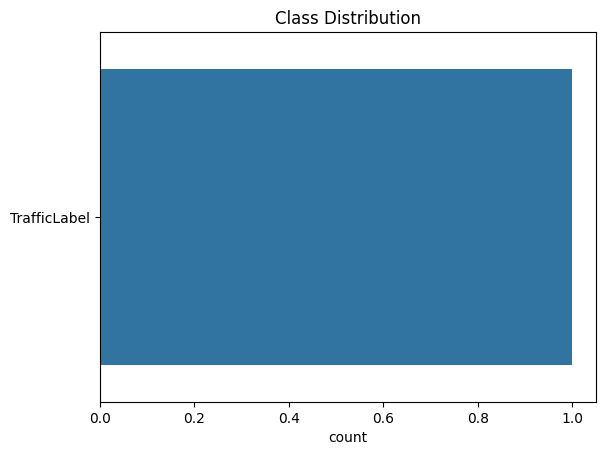

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(['TrafficLabel'])
plt.title("Class Distribution")
plt.show()